# Naive Bayes Classifier

## 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#%matplotlib inline

## 2.Import Dataset

In [2]:
data=pd.read_csv('mushroom_csv.csv')
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


 ### 2.1. Graph Represents Count of Edible and Poisionus

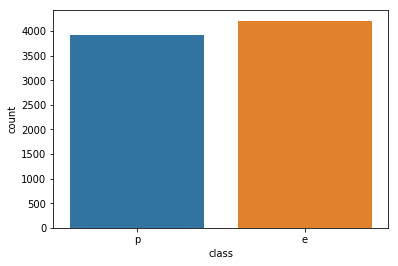

In [3]:
x=data['class']
ax=sns.countplot(x=x,data=data)

### 2.2.Graphs represents the count of edible and poisonus mushrooms basd on different features


In [4]:
def plot_data(hue,data):
    for i,col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax=sns.countplot(x=data[col],hue=hue,data=data)

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


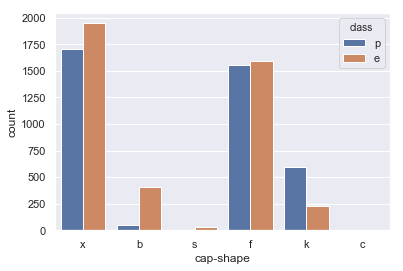

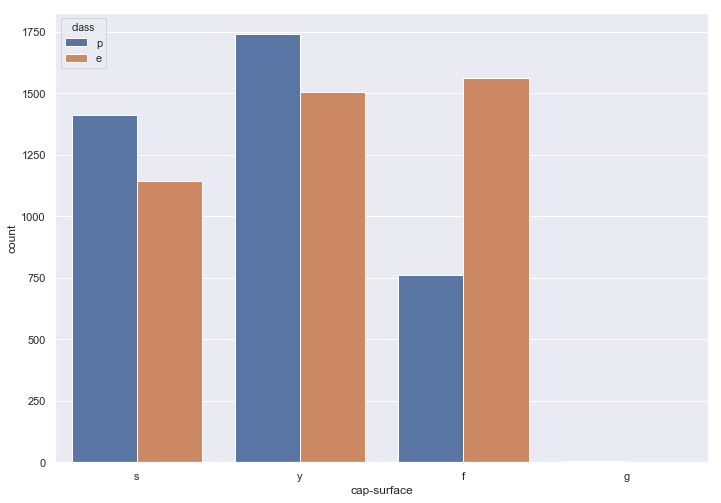

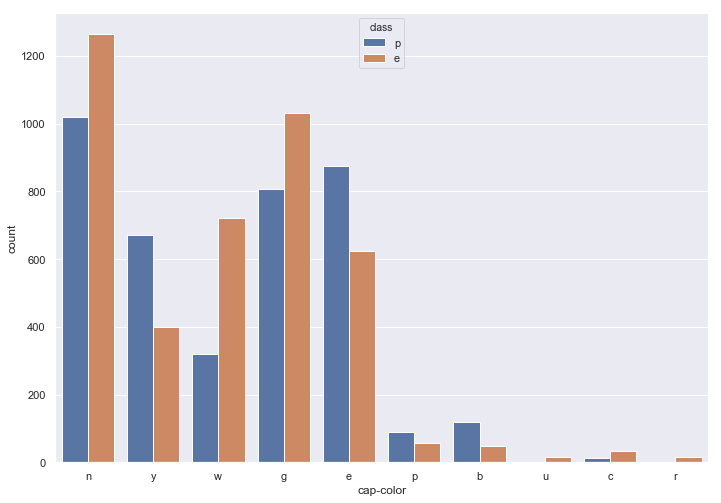

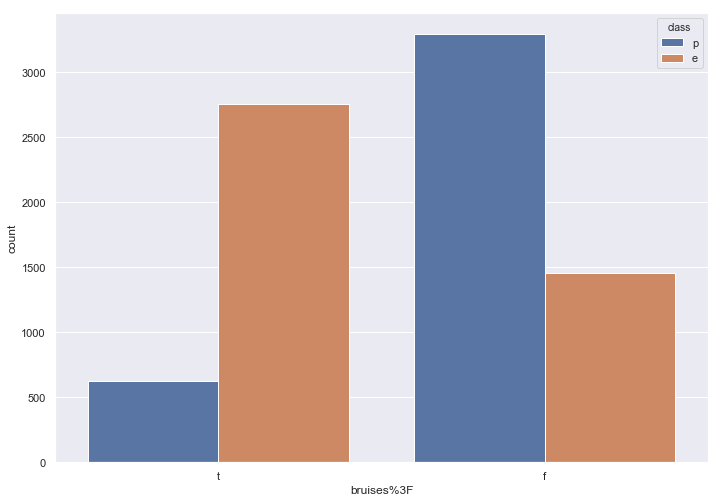

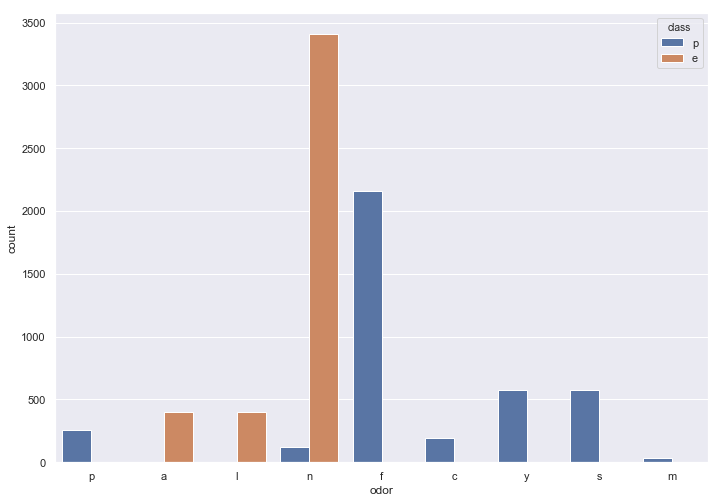

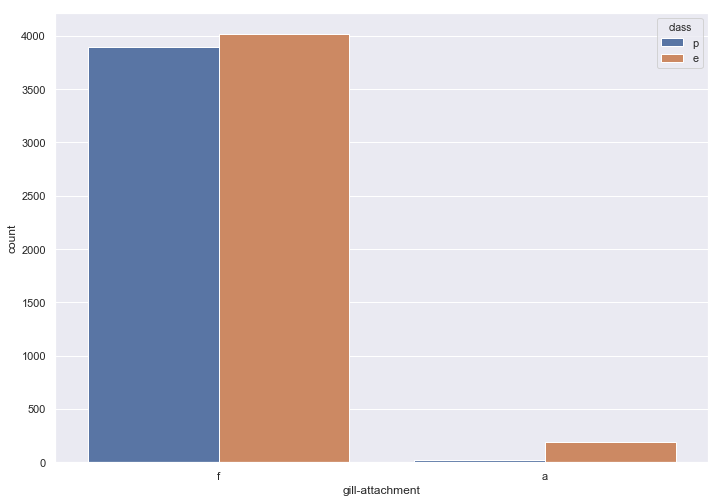

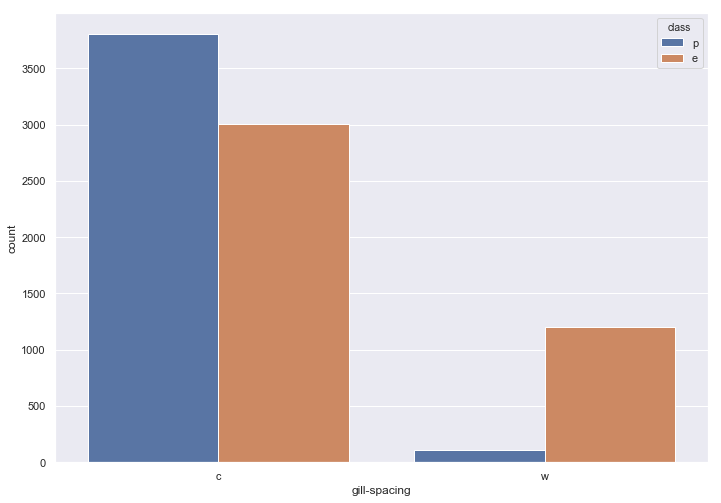

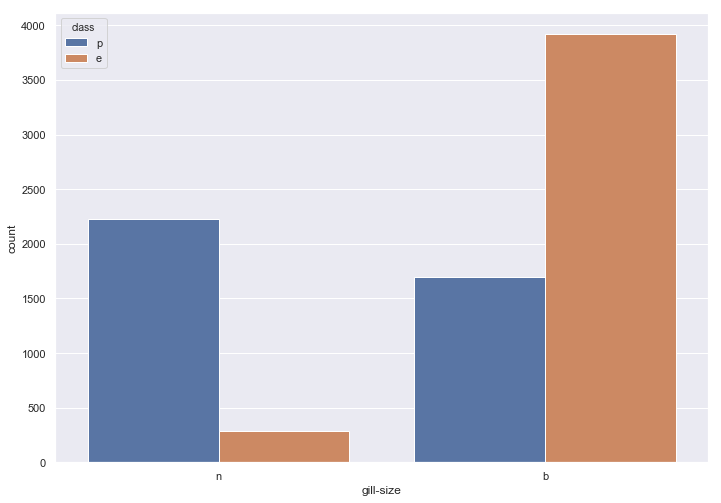

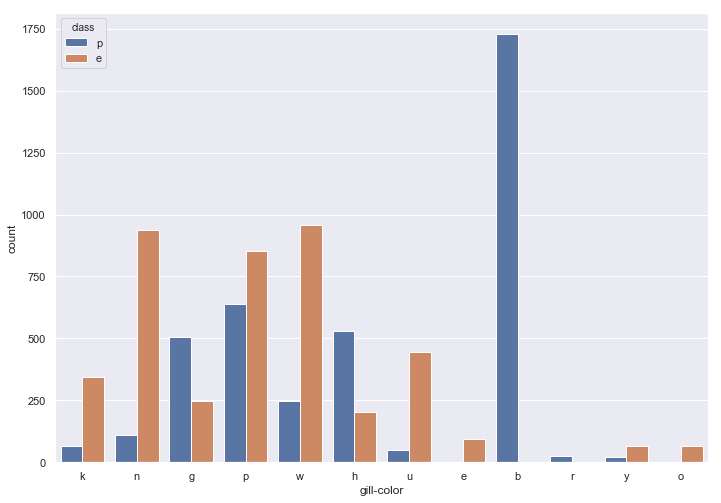

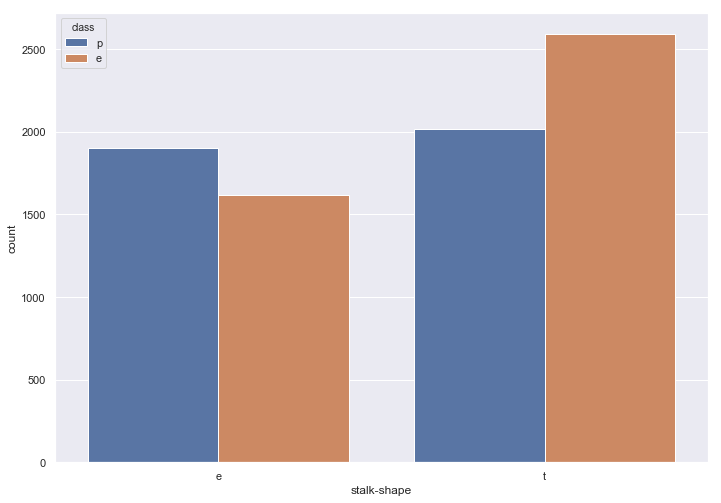

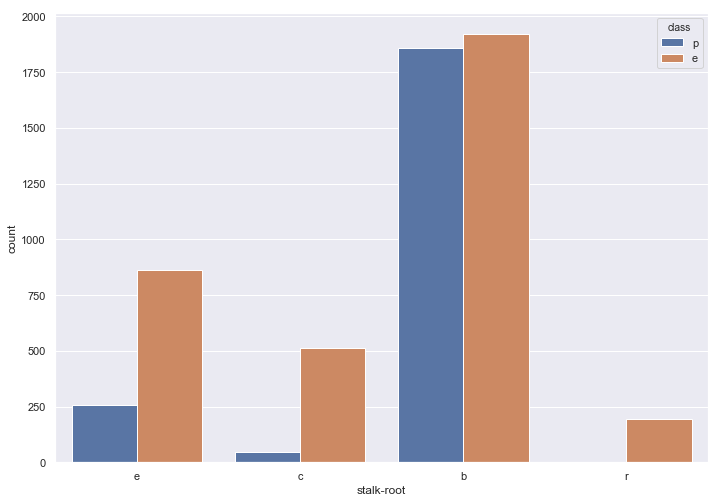

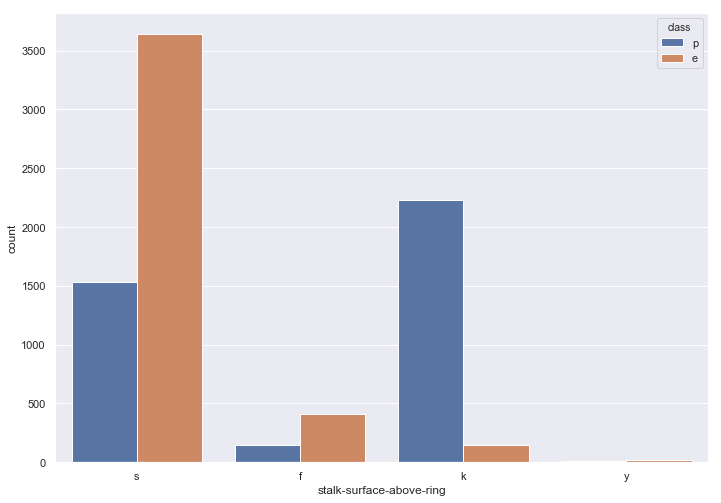

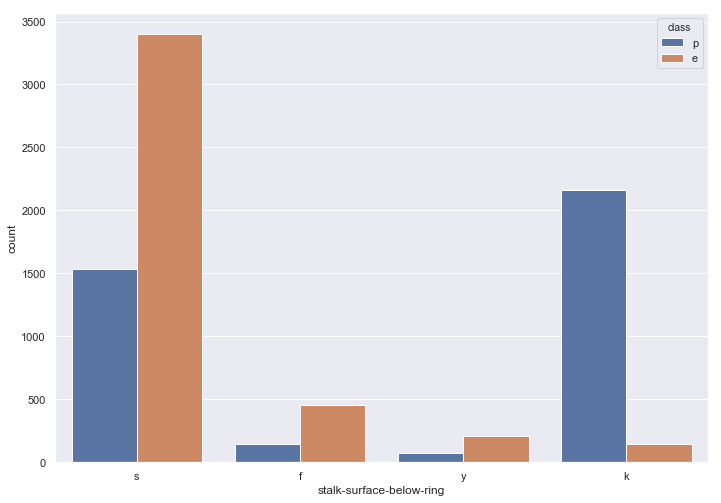

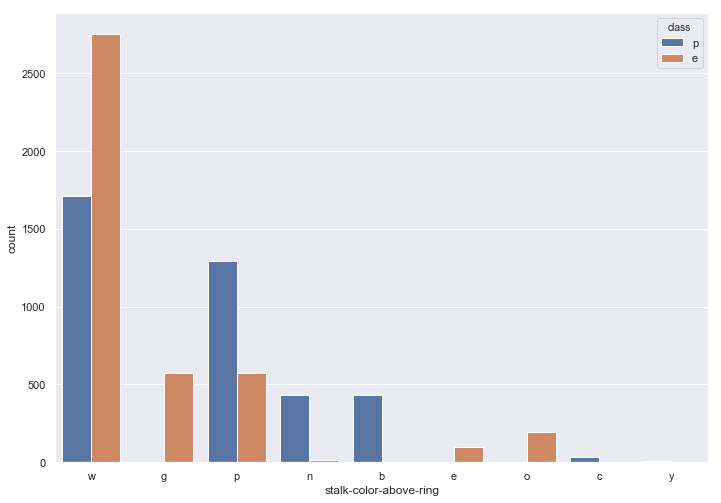

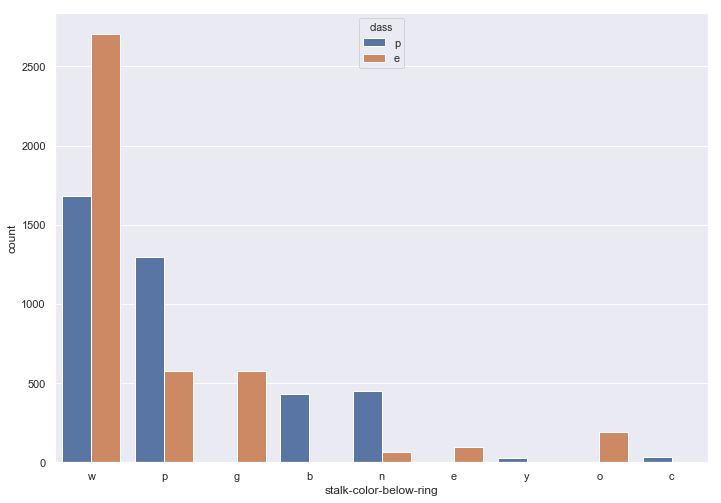

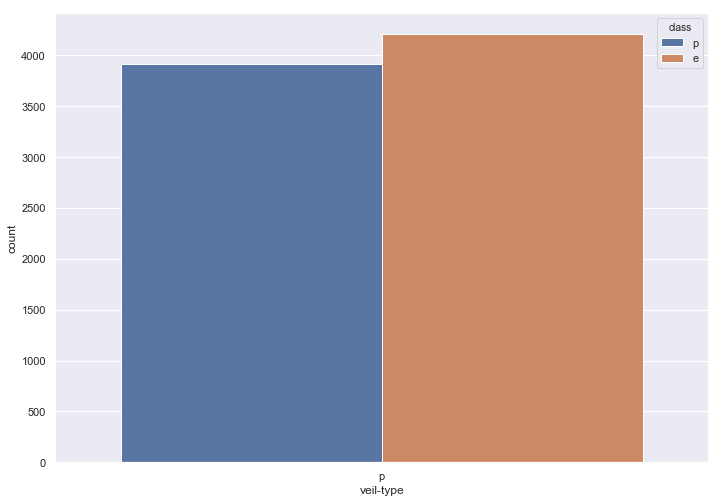

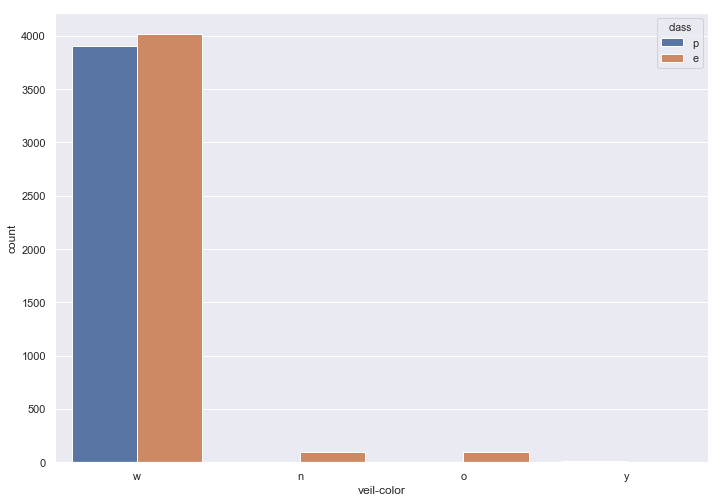

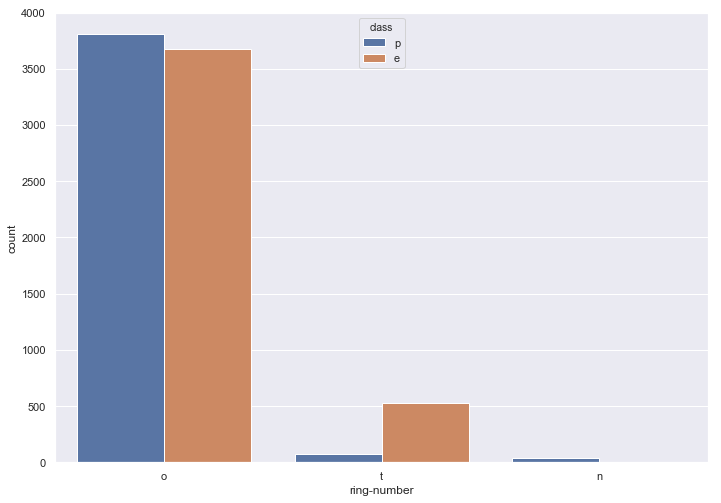

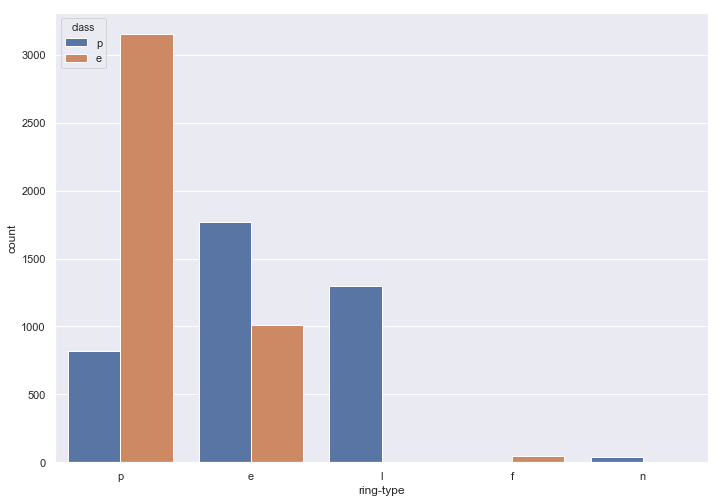

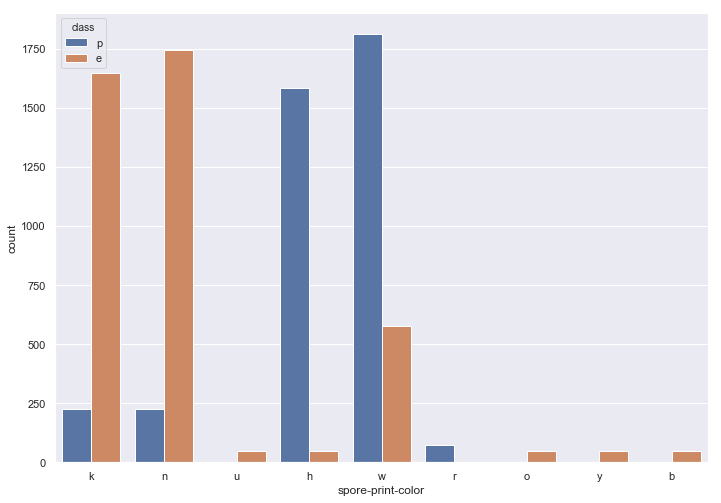

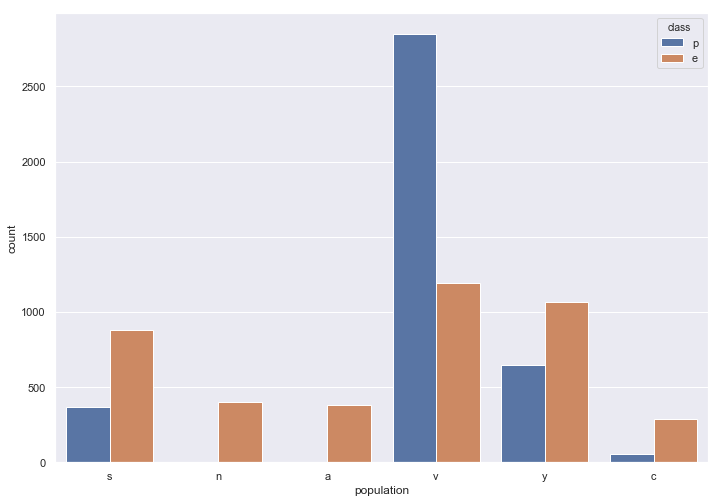

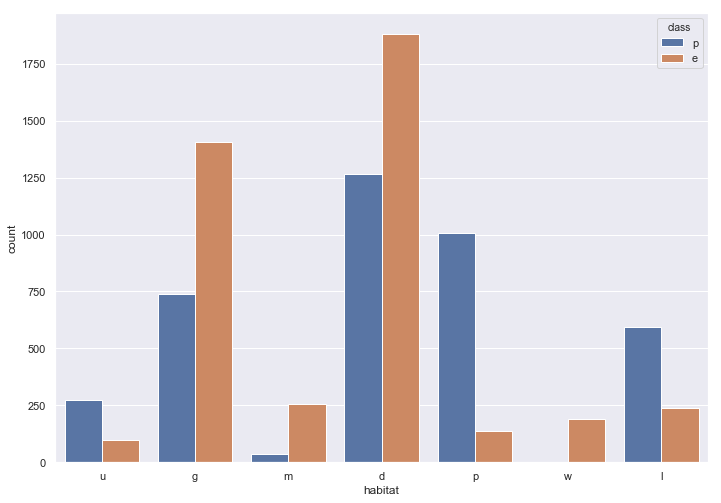

In [5]:
hue=data['class']
data_for_plot=data.drop('class',1)
plot_data(hue,data_for_plot)

## 3.Data Preprocessing

### 3.1.Checking for null values in the dataset

In [6]:
#for col in data.columns:
   # print("{}:{}".format(col,data[col].isnull().sum()))
data.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

### 3.2.Cleaning data  

In [7]:
data.drop(["stalk-root"],axis=1,inplace=True)

In [8]:
#for col in data.columns:
   # print("{}:{}".format(col,data[col].isnull().sum()))
data.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

### 3.3.Encoding the categorical data for target  using LabelEncoder

In [9]:
le=LabelEncoder()
data['class']=le.fit_transform(data['class'])
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0


### 3.4.Encoding data for features using OneHotEncoder

In [10]:
encoded_data=pd.get_dummies(data)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## 4.Define the features and target & Splitting Dataset into Train and Test data set

In [11]:
from sklearn.model_selection import train_test_split
y=data['class'].values.reshape(-1,1)
x=encoded_data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## 5.Fit the Model

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
clf_GNB = GaussianNB()
clf_GNB.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## 6.Check the model's prediction for testing set

In [132]:

trr=clf_GNB.predict(x_test)
trr

array([0, 1, 0, ..., 0, 1, 1])

In [133]:
y_prob=clf_GNB.predict_proba(x_test)[:,1]
y_pred=np.where(y_prob>0.5,1,0)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [105]:
#y_pred_GNB=clf_GNB.predict(x_test)
#y_pred_GNB

In [98]:
x_test

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1440,0,0,0,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,0
6758,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
735,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
7430,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1267,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2897,0,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1970,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7806,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2121,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6585,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


## 7.Validation - checking accuracy

In [142]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
cfm=metrics.confusion_matrix(y_test, y_pred)
cfm

array([[842,   0],
       [  0, 783]], dtype=int64)

Text(0.5, 50.92999999999999, 'Predicted label')

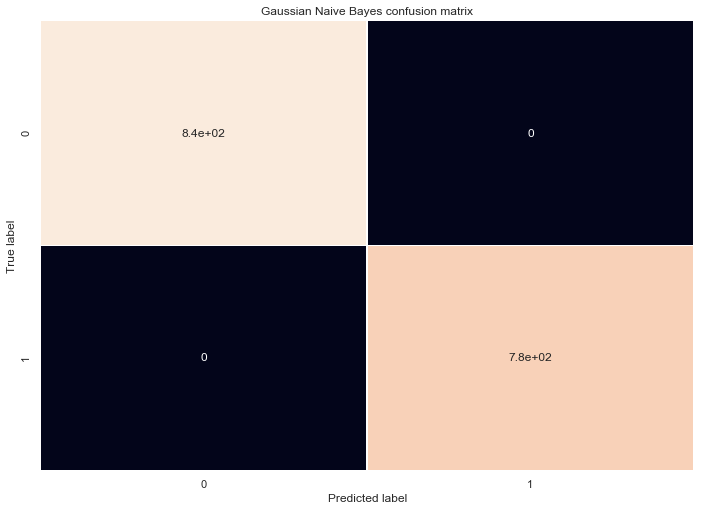

In [107]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [146]:
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [147]:
ypred=clf_GNB.predict(x_train)
from sklearn.metrics import r2_score
r2_score(y_train,ypred)

1.0

## 8.Plot for the model

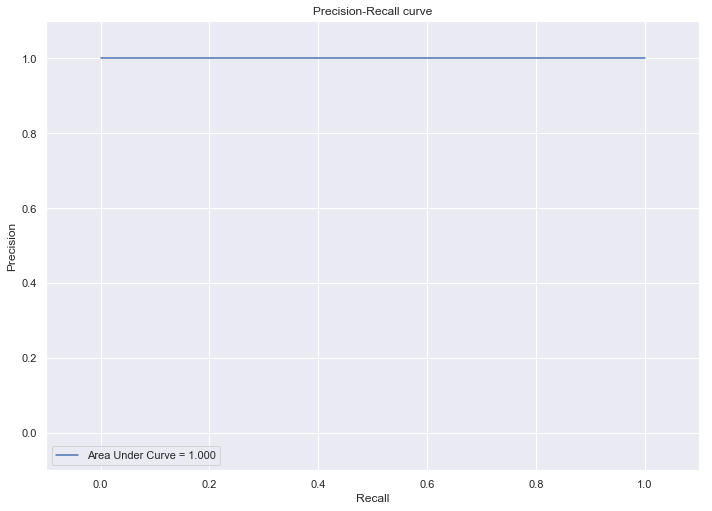

In [148]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_GNB)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

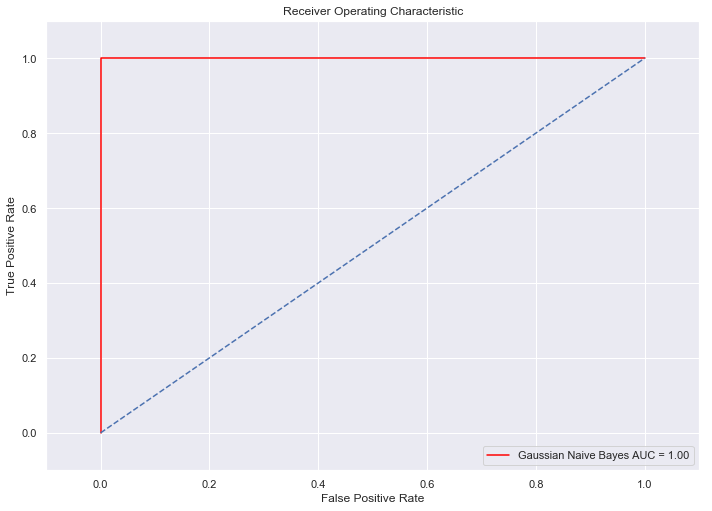

In [149]:
def roc_curve_acc(y_test, y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red',label='%s AUC = %0.2f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(y_test, y_pred_GNB, "Gaussian Naive Bayes")

## 9.Productization for new features

In [150]:
clf_GNB.predict([[1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([1])

In [151]:
p=clf_GNB.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
if(p==0):
    print("Mushroom is Edible",p)
else:
    print("Mushroom is Poisionous",p)

Mushroom is Edible [0]


In [154]:
p=clf_GNB.predict([[1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
if(p==0):
    print("Mushroom is Edible",p)
else:
    print("Mushroom is Poisionous",p)

Mushroom is Poisionous [1]
